<a href="https://colab.research.google.com/github/yuhueoeo/Beajar_DS/blob/master/FS_Customer_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as py

In [6]:
df = pd.read_csv('loans_fs.csv')

In [7]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,dti,grade,annual_inc,home_ownership,pymnt_plan,purpose,emp_title,issue_d,loan_status,emp_length
0,0,5000.0,36 months,10.65,27.65,B,24000.0,RENT,n,credit_card,NaN,Dec-2011,Fully Paid,10+ years
1,1,2500.0,60 months,15.27,1.00,C,30000.0,RENT,n,car,Ryder,Dec-2011,Charged Off,< 1 year
2,2,2400.0,36 months,2.20,8.72,C,12252.0,RENT,n,small_business,NaN,Dec-2011,Fully Paid,10+ years
3,3,10000.0,36 months,13.49,20.00,C,49200.0,RENT,n,other,AIR RESOURCES BOARD,Dec-2011,Fully Paid,10+ years
4,4,3000.0,60 months,12.69,17.94,B,80000.0,RENT,n,other,University Medical Group,Dec-2011,Current,1 year


In [8]:
df = df.rename(columns = {"Unnamed: 0" : "row_id"})

In [9]:
df.shape

(887379, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   row_id          887379 non-null  int64  
 1   loan_amnt       887379 non-null  float64
 2   term            887379 non-null  object 
 3   int_rate        887379 non-null  float64
 4   dti             887379 non-null  float64
 5   grade           887379 non-null  object 
 6   annual_inc      887375 non-null  float64
 7   home_ownership  887379 non-null  object 
 8   pymnt_plan      887379 non-null  object 
 9   purpose         887379 non-null  object 
 10  emp_title       835917 non-null  object 
 11  issue_d         887379 non-null  object 
 12  loan_status     887379 non-null  object 
 13  emp_length      842554 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 94.8+ MB


In [11]:
df.isnull().sum() / len(df) * 100

,0
row_id,0.000000
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
dti,0.000000
grade,0.000000
annual_inc,0.000451
home_ownership,0.000000
pymnt_plan,0.000000
purpose,0.000000


In [12]:
df.isnull().sum()

,0
row_id,0
loan_amnt,0
term,0
int_rate,0
dti,0
grade,0
annual_inc,4
home_ownership,0
pymnt_plan,0
purpose,0


In [13]:
df['issue_d'].unique()[:20]

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010'],
      dtype=object)

In [14]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   row_id          887379 non-null  int64         
 1   loan_amnt       887379 non-null  float64       
 2   term            887379 non-null  object        
 3   int_rate        887379 non-null  float64       
 4   dti             887379 non-null  float64       
 5   grade           887379 non-null  object        
 6   annual_inc      887375 non-null  float64       
 7   home_ownership  887379 non-null  object        
 8   pymnt_plan      887379 non-null  object        
 9   purpose         887379 non-null  object        
 10  emp_title       835917 non-null  object        
 11  issue_d         887379 non-null  datetime64[ns]
 12  loan_status     887379 non-null  object        
 13  emp_length      842554 non-null  object        
dtypes: datetime64[ns](1), float64(4), in

In [16]:
cols = ['emp_title', 'emp_length']
df[cols] = df[cols].fillna('Unknown')

In [17]:
df = df.dropna(subset=['annual_inc'])

In [18]:
df.isnull().sum()

,0
row_id,0
loan_amnt,0
term,0
int_rate,0
dti,0
grade,0
annual_inc,0
home_ownership,0
pymnt_plan,0
purpose,0


In [19]:
df.describe()

,row_id,loan_amnt,int_rate,dti,annual_inc,issue_d
count,887375.000000,887375.000000,887375.000000,8.873750e+05,8.873750e+05,887375
mean,443690.808530,15615.419749,13.351828,-8.652665e+03,9.031366e+04,2014-07-10 07:07:35.213635328
min,0.000000,-50000.000000,1.000000,-2.500000e+06,-5.000000e+04,2007-06-01 00:00:00
25%,221847.500000,8000.000000,9.990000,1.169000e+01,4.500000e+04,2013-12-01 00:00:00
50%,443691.000000,12950.000000,12.990000,1.753000e+01,6.400000e+04,2014-11-01 00:00:00
75%,665534.500000,20000.000000,16.490000,2.386000e+01,9.000000e+04,2015-07-01 00:00:00
max,887378.000000,250000.000000,28.990000,9.999000e+03,1.500000e+07,2015-12-01 00:00:00
std,256163.557662,21410.469686,5.135788,1.381909e+05,2.052390e+05,NaN


In [20]:
df[df['loan_amnt']<=0].shape

(13924, 14)

In [21]:
df[df['dti']<=0].shape

(10446, 14)

In [22]:
df[df['annual_inc']<=0].shape

(13936, 14)

In [63]:
df_2 = df[(df['loan_amnt'] > 0) & (df['dti'].between(0,100)) & (df['annual_inc'] > 0)]

In [64]:
df_2.describe()

,row_id,loan_amnt,int_rate,dti,annual_inc,issue_d
count,867678.000000,867678.000000,867678.000000,867678.000000,8.676780e+05,867678
mean,443684.181067,15042.539369,13.352329,18.132351,7.802731e+04,2014-07-10 07:31:15.441350656
min,0.000000,500.000000,1.000000,0.000000,1.896000e+03,2007-06-01 00:00:00
25%,221838.250000,8000.000000,9.990000,11.910000,4.500000e+04,2013-12-01 00:00:00
50%,443745.500000,13000.000000,12.990000,17.660000,6.500000e+04,2014-11-01 00:00:00
75%,665469.750000,20000.000000,16.490000,23.950000,9.000000e+04,2015-07-01 00:00:00
max,887378.000000,250000.000000,28.990000,90.000000,1.500000e+07,2015-12-01 00:00:00
std,256151.466759,11507.060526,5.136220,8.306941,1.066382e+05,NaN


In [65]:
df_2.select_dtypes(include='object').nunique()

,0
term,2
grade,7
home_ownership,6
pymnt_plan,2
purpose,14
emp_title,293782
loan_status,10
emp_length,12


<Axes: >

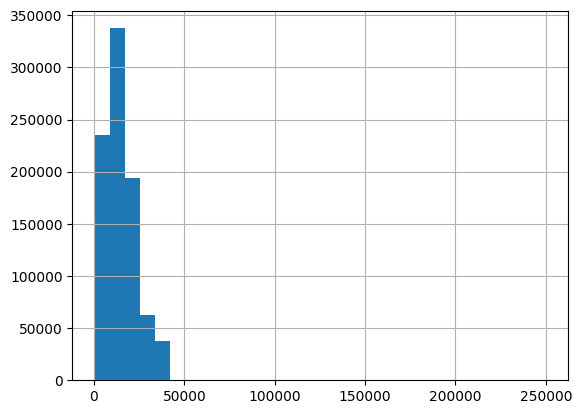

In [66]:
df_2['loan_amnt'].hist(bins=30)

<Axes: xlabel='grade'>

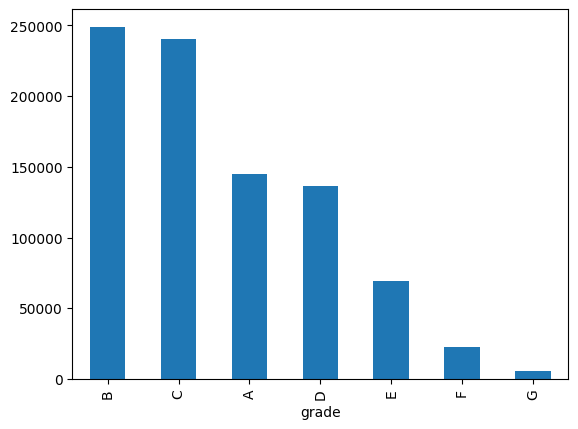

In [67]:
df_2['grade'].value_counts().plot(kind='bar')

<Axes: xlabel='home_ownership'>

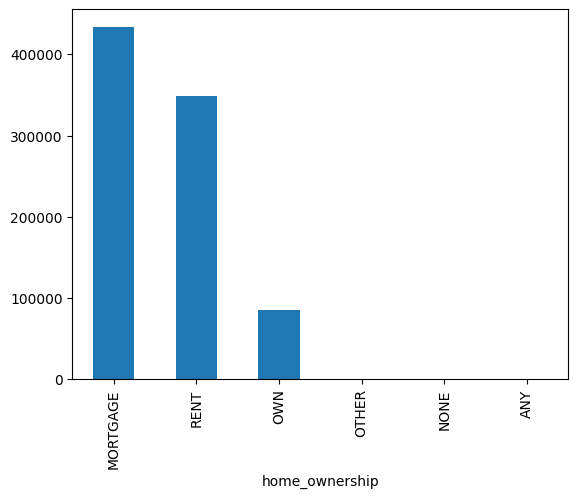

In [68]:
df_2['home_ownership'].value_counts().plot(kind='bar')

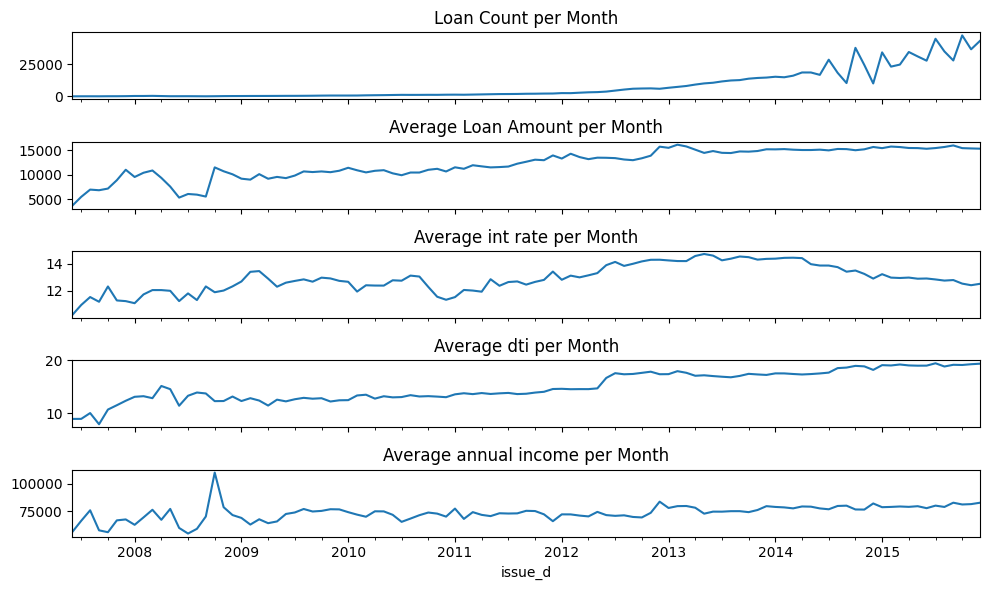

In [69]:
import matplotlib.pyplot as plt

loan_count = df_2.groupby('issue_d')['loan_amnt'].count()
loan_avg   = df_2.groupby('issue_d')['loan_amnt'].mean()
int_rate_avg = df_2.groupby('issue_d')['int_rate'].mean()
dti_avg = df_2.groupby('issue_d')['dti'].mean()
annual_inc_avg = df_2.groupby('issue_d')['annual_inc'].mean()

fig, ax = plt.subplots(5, 1, figsize=(10,6), sharex=True)

loan_count.plot(ax=ax[0], title='Loan Count per Month')
loan_avg.plot(ax=ax[1], title='Average Loan Amount per Month')
int_rate_avg.plot(ax=ax[2], title='Average int rate per Month')
dti_avg.plot(ax=ax[3], title='Average dti per Month')
annual_inc_avg.plot(ax=ax[4], title='Average annual income per Month')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Loan Count by Grade Over Time'}, xlabel='issue_d'>

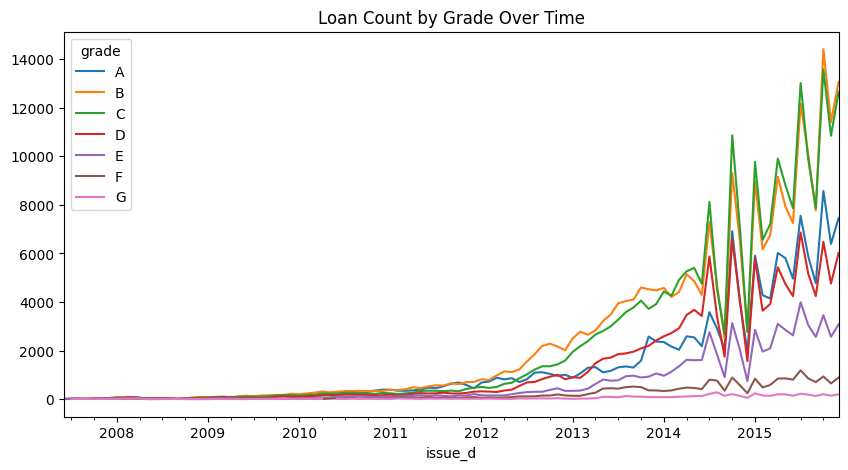

In [70]:
df_2.groupby([df_2['issue_d'].dt.to_period('M'), 'grade']).size().unstack().plot(
    figsize=(10,5),
    title='Loan Count by Grade Over Time'
)


<Axes: title={'center': 'Loan Status Trend Over Time'}, xlabel='issue_d'>

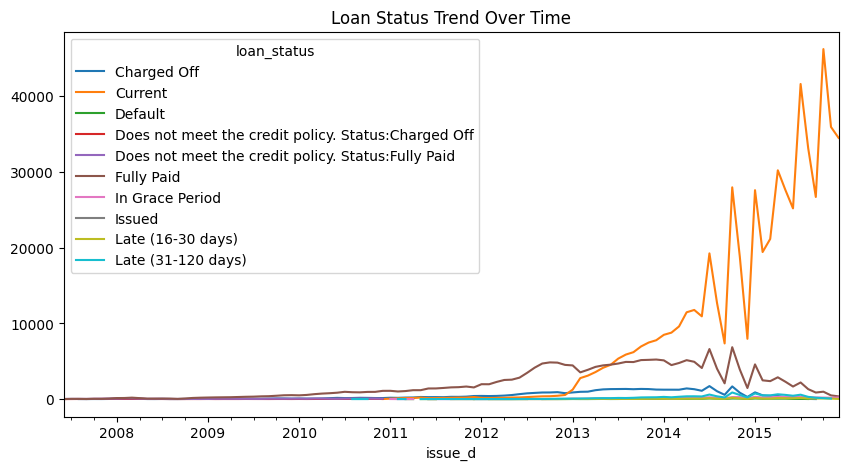

In [71]:
df_2.groupby([df_2['issue_d'].dt.to_period('M'), 'loan_status']).size().unstack().plot(
    figsize=(10,5),
    title='Loan Status Trend Over Time'
)


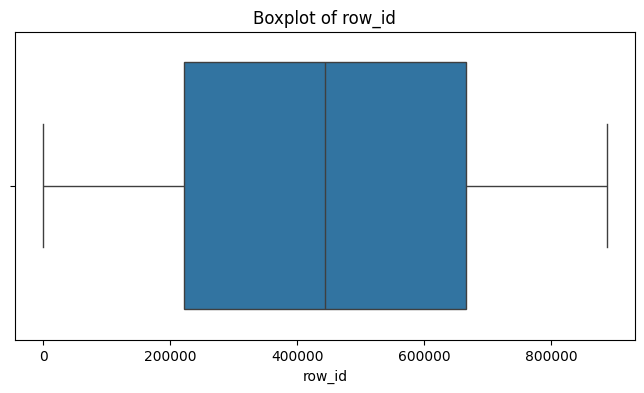

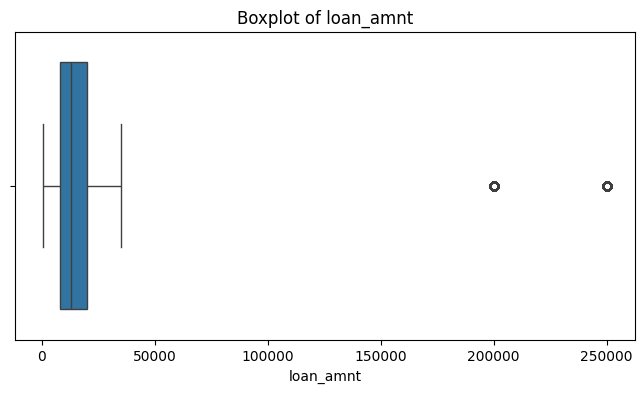

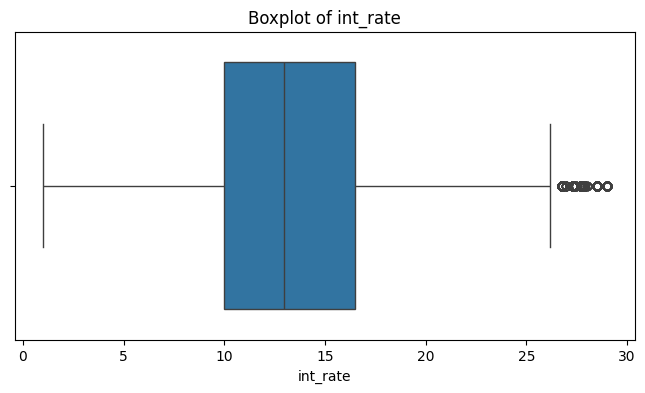

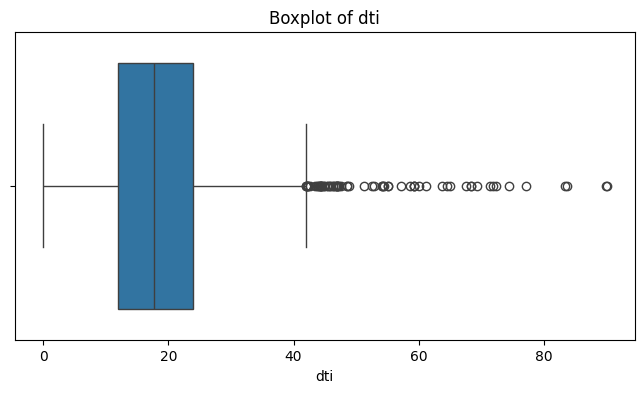

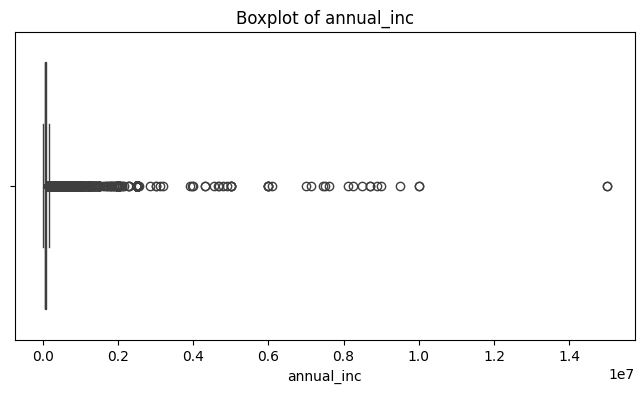

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_2.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [73]:
df_2.groupby(df_2['issue_d'].dt.year)['loan_amnt'].count()

,loan_amnt
issue_d,
2007,590
2008,2344
2009,5171
2010,12230
2011,21228
2012,52222
2013,131785
2014,230322
2015,411786


In [74]:
 df_2.groupby([df_2['issue_d'].dt.year, 'emp_length']).size().unstack(fill_value=0)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Unknown
issue_d,,,,,,,,,,,,
2007,120,57,77,43,32,19,22,14,13,15,178,0
2008,308,437,285,207,172,119,129,85,91,46,465,0
2009,713,827,705,503,418,335,220,189,184,181,896,0
2010,838,2606,1500,1453,1088,1078,595,513,467,399,1349,344
2011,1537,5231,2048,2064,1853,1824,1364,1028,804,670,2064,741
2012,3571,15091,4790,3781,3891,4453,3663,2964,2226,1862,4045,1885
2013,7629,44793,10984,9868,6730,9509,7967,7995,6527,5088,8877,5818
2014,14243,77729,20006,17813,13228,12795,11573,12821,11603,9214,17539,11758
2015,26870,138402,36688,32629,23979,24392,16445,18035,21094,16411,33553,23288


In [77]:
df_2['issue_year'] = df_2['issue_d'].dt.year

df_2.groupby('issue_year')[['loan_amnt','annual_inc','dti','int_rate']].mean()


/tmp/ipython-input-3610165735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['issue_year'] = df_2['issue_d'].dt.year


,loan_amnt,annual_inc,dti,int_rate
issue_year,,,,
2007,8255.847458,64800.221644,10.726186,11.418390
2008,9378.135666,71032.981834,13.215030,11.836335
2009,10139.740863,72392.901197,12.467807,12.837380
2010,10705.662306,71253.535016,13.106875,12.384979
2011,12318.101093,72242.694466,13.835386,12.530835
2012,13719.829287,72594.124652,16.658855,13.812097
2013,14976.354289,76091.709865,17.213923,14.391607
2014,15165.683478,77945.132395,18.042917,13.818854
2015,15535.373592,80010.666399,19.143670,12.789425


In [80]:
 df_2.groupby([df_2['issue_d'].dt.year, 'home_ownership']).size().unstack(fill_value=0)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
issue_d,,,,,,
2007,0,205,3,0,51,331
2008,0,913,1,47,147,1236
2009,0,2012,0,85,458,2616
2010,0,5472,0,3,945,5810
2011,0,9932,0,1,1577,9718
2012,0,24426,42,45,4122,23587
2013,0,70410,0,0,11018,50357
2014,1,117180,0,0,22505,90636
2015,2,203105,0,0,44705,163974


In [81]:
 df_2.groupby([df_2['issue_d'].dt.year, 'term']).size().unstack(fill_value=0)

term,36 months,60 months
issue_d,,
2007,590,0
2008,2344,0
2009,5171,0
2010,8926,3304
2011,13790,7438
2012,42539,9683
2013,98176,33609
2014,158956,71366
2015,276896,134890


In [82]:
 df_2.groupby([df_2['issue_d'].dt.year, 'grade']).size().unstack(fill_value=0)

grade,A,B,C,D,E,F,G
issue_d,,,,,,,
2007,73,97,139,98,98,52,33
2008,313,574,572,412,279,109,85
2009,1176,1409,1325,808,299,103,51
2010,2762,3593,2658,1844,940,302,131
2011,5629,6419,3859,2730,1688,706,197
2012,10681,18119,11585,7173,3119,1288,257
2013,17284,43116,37274,20124,8863,4278,846
2014,35281,60558,65054,42047,19663,6076,1643
2015,71702,115059,117887,61248,34155,9606,2129


In [83]:
 df_2.groupby([df_2['issue_d'].dt.year, 'pymnt_plan']).size().unstack(fill_value=0)

pymnt_plan,n,y
issue_d,,
2007,590,0
2008,2344,0
2009,5171,0
2010,12227,3
2011,21228,0
2012,52221,1
2013,131784,1
2014,230318,4
2015,411785,1


In [84]:
 df_2.groupby([df_2['issue_d'].dt.year, 'loan_status']).size().unstack(fill_value=0)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
issue_d,,,,,,,,,,
2007,45,0,0,109,233,203,0,0,0,0
2008,246,0,0,244,570,1284,0,0,0,0
2009,587,0,0,127,427,4030,0,0,0,0
2010,1450,7,1,266,714,9785,0,0,2,5
2011,3124,1908,8,0,0,16110,25,0,9,44
2012,7902,3359,28,0,0,40608,83,0,27,215
2013,14487,58961,180,0,0,55154,956,0,311,1736
2014,13646,155028,600,0,0,53460,2013,0,839,4736
2015,2697,369267,374,0,0,22455,3032,8252,1108,4601


In [85]:
 df_2.groupby([df_2['issue_d'].dt.year, 'purpose']).size().unstack(fill_value=0)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
issue_d,,,,,,,,,,,,,,
2007,13,85,204,36,36,8,10,8,14,108,0,55,4,9
2008,54,390,951,84,139,26,89,50,31,334,3,124,13,56
2009,188,617,2142,182,382,69,256,91,67,640,6,360,28,143
2010,412,1509,5581,110,931,101,849,211,210,1414,39,454,126,283
2011,918,2763,10404,0,1651,210,1059,372,300,1828,55,956,223,489
2012,880,10146,30139,0,2833,405,1337,614,386,2998,68,1359,336,721
2013,1021,32048,78834,0,7237,664,2257,872,623,5720,50,1322,555,582
2014,1785,54217,139834,0,12746,730,3773,2289,1300,10147,122,2221,1151,7
2015,3385,99804,244517,1,24674,1400,7307,3849,2369,18765,220,3292,2199,4


In [91]:
df_2['issue_y'] = df_2['issue_d'].dt.year

/tmp/ipython-input-3058635755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['issue_y'] = df_2['issue_d'].dt.year


In [93]:
df_2.head()

,row_id,loan_amnt,term,int_rate,dti,grade,annual_inc,home_ownership,pymnt_plan,purpose,emp_title,issue_d,loan_status,emp_length,issue_year,dti_group,issue_y
0,0,5000.0,36 months,10.65,27.65,B,24000.0,RENT,n,credit_card,Unknown,2011-12-01,Fully Paid,10+ years,2011,20-30%,2011
1,1,2500.0,60 months,15.27,1.00,C,30000.0,RENT,n,car,Ryder,2011-12-01,Charged Off,< 1 year,2011,0-10%,2011
2,2,2400.0,36 months,2.20,8.72,C,12252.0,RENT,n,small_business,Unknown,2011-12-01,Fully Paid,10+ years,2011,0-10%,2011
3,3,10000.0,36 months,13.49,20.00,C,49200.0,RENT,n,other,AIR RESOURCES BOARD,2011-12-01,Fully Paid,10+ years,2011,20-30%,2011
4,4,3000.0,60 months,12.69,17.94,B,80000.0,RENT,n,other,University Medical Group,2011-12-01,Current,1 year,2011,10-20%,2011


In [86]:
df_2.select_dtypes(include='number').corr()

,row_id,loan_amnt,int_rate,dti,annual_inc,issue_year
row_id,1.000000,0.051509,-0.072582,0.123889,0.016888,0.822895
loan_amnt,0.051509,1.000000,0.055377,0.031820,0.653694,0.076992
int_rate,-0.072582,0.055377,1.000000,0.099787,-0.027336,-0.048820
dti,0.123889,0.031820,0.099787,1.000000,-0.107567,0.160218
annual_inc,0.016888,0.653694,-0.027336,-0.107567,1.000000,0.022593
issue_year,0.822895,0.076992,-0.048820,0.160218,0.022593,1.000000


In [116]:
bins = [0, 10, 20, 30, 40, df_2['dti'].max()]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '>40%']

df_2['dti_group'] = pd.cut(df_2['dti'], bins=bins, labels=labels, right=False)

/tmp/ipython-input-3974977424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['dti_group'] = pd.cut(df_2['dti'], bins=bins, labels=labels, right=False)


In [117]:
df_2.groupby(['dti_group'])[['loan_amnt','int_rate']].mean()


/tmp/ipython-input-1388029684.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby(['dti_group'])[['loan_amnt','int_rate']].mean()


,loan_amnt,int_rate
dti_group,,
0-10%,13900.168328,12.752642
10-20%,15277.341390,13.129558
20-30%,15415.246268,13.626075
30-40%,14922.322643,14.624721
>40%,17743.750000,16.542500


In [118]:
df_2.groupby([ 'dti_group','home_ownership']).size().unstack(fill_value=0)


/tmp/ipython-input-2167085109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby([ 'dti_group','home_ownership']).size().unstack(fill_value=0)


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
dti_group,,,,,,
0-10%,0,74859,8,55,14627,64763
10-20%,1,188653,19,83,33037,145318
20-30%,1,133472,12,37,27458,105782
30-40%,1,36625,7,6,10399,32378
>40%,0,45,0,0,7,24


In [119]:
df_2.groupby([ 'dti_group','purpose']).size().unstack(fill_value=0)


/tmp/ipython-input-3564759418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby([ 'dti_group','purpose']).size().unstack(fill_value=0)


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
dti_group,,,,,,,,,,,,,,
0-10%,3010,32717,77569,185,14700,1236,5719,1905,1401,10207,152,3668,1083,760
10-20%,3447,87917,216698,180,21116,1451,6719,3386,2192,16874,248,4052,1833,998
20-30%,1763,62729,167165,48,11663,753,3542,2321,1343,11464,132,2002,1349,488
30-40%,436,18201,51123,0,3144,173,957,744,363,3406,31,421,369,48
>40%,0,15,50,0,6,0,0,0,1,3,0,0,1,0


In [120]:
df_2.groupby([ 'dti_group','loan_status']).size().unstack(fill_value=0)

/tmp/ipython-input-1272205093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby([ 'dti_group','loan_status']).size().unstack(fill_value=0)


loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
dti_group,,,,,,,,,,
0-10%,6987,95110,142,214,602,47178,901,1269,358,1551
10-20%,18408,243065,463,347,850,93162,2374,3211,895,4336
20-30%,15353,187035,439,185,492,53764,2100,2642,768,3984
30-40%,3436,63256,147,0,0,8984,732,1120,275,1466
>40%,0,63,0,0,0,1,2,10,0,0


In [125]:
temp = df_2.groupby(df_2['issue_d']).agg({
    'loan_amnt': 'count',        # acquisition proxy
    'int_rate': 'mean'
}).rename(columns={'loan_amnt':'loan_count'})

temp.corr()

,loan_count,int_rate
loan_count,1.000000,0.320371
int_rate,0.320371,1.000000


In [126]:
df_2.groupby([ 'issue_y','dti_group']).size().unstack(fill_value=0)

/tmp/ipython-input-377927261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby([ 'issue_y','dti_group']).size().unstack(fill_value=0)


dti_group,0-10%,10-20%,20-30%,30-40%,>40%
issue_y,,,,,
2007,284,232,74,0,0
2008,837,1016,491,0,0
2009,1968,2389,814,0,0
2010,4105,5924,2201,0,0
2011,6546,10228,4454,0,0
2012,11025,23551,15226,2420,0
2013,25160,59189,40540,6896,0
2014,39386,99969,72787,18180,0
2015,65001,164613,130175,51920,76


In [131]:
df_2.groupby('grade')['int_rate'].mean()

,int_rate
grade,
A,9.863413
B,10.829139
C,14.197527
D,17.176001
E,19.898870
F,8.481579
G,25.631028


In [132]:
df_2.groupby('home_ownership')['int_rate'].mean()


,int_rate
home_ownership,
ANY,14.233333
MORTGAGE,13.175002
NONE,12.995435
OTHER,13.233978
OWN,13.346117
RENT,13.574759


In [133]:
df_2[['dti','int_rate','annual_inc']].corr()


,dti,int_rate,annual_inc
dti,1.000000,0.099787,-0.107567
int_rate,0.099787,1.000000,-0.027336
annual_inc,-0.107567,-0.027336,1.000000


<Axes: xlabel='grade', ylabel='int_rate'>

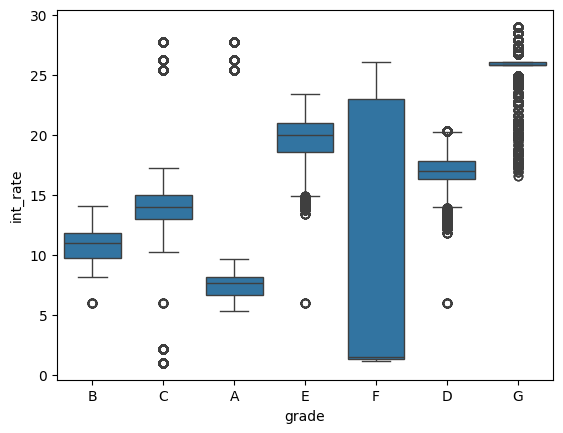

In [134]:
sns.boxplot(x='grade', y='int_rate', data=df_2)

<Axes: xlabel='dti', ylabel='int_rate'>

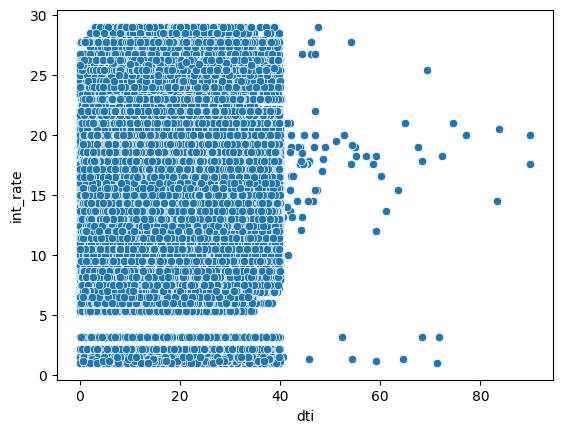

In [135]:

sns.scatterplot(x='dti', y='int_rate', data=df_2)

In [136]:
df_2.groupby('loan_status')[['loan_amnt','int_rate','dti','annual_inc']].mean()



,loan_amnt,int_rate,dti,annual_inc
loan_status,,,,
Charged Off,14862.266318,15.247839,18.404274,68320.885162
Current,15527.790172,13.117522,18.744130,79102.398274
Default,15565.973971,15.285013,19.994165,69275.052343
Does not meet the credit policy. Status:Charged Off,9574.564343,13.316247,14.332962,69831.100992
Does not meet the credit policy. Status:Fully Paid,9140.560700,13.284666,14.119537,75576.759182
Fully Paid,13628.727922,13.477919,16.142700,77185.807196
In Grace Period,16430.647405,14.729265,19.433048,80820.391940
Issued,15594.722492,12.644127,19.466872,81534.261865
Late (16-30 days),16042.770035,15.052326,19.351246,76656.176211


In [137]:
pd.crosstab(df_2['loan_status'], df_2['grade'], normalize='index')

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,0.057758,0.209782,0.279785,0.231713,0.138512,0.064956,0.017495
Current,0.171646,0.285535,0.284392,0.152874,0.078147,0.022556,0.004849
Default,0.038623,0.162049,0.295550,0.255248,0.166247,0.063812,0.018472
Does not meet the credit policy. Status:Charged Off,0.010724,0.112601,0.195710,0.260054,0.206434,0.123324,0.091153
Does not meet the credit policy. Status:Fully Paid,0.043724,0.134259,0.243827,0.247942,0.190329,0.078704,0.061214
Fully Paid,0.191089,0.320313,0.253377,0.144735,0.062224,0.022714,0.005549
In Grace Period,0.057784,0.199542,0.301359,0.224750,0.145196,0.056965,0.014405
Issued,0.171352,0.299321,0.292414,0.139360,0.069922,0.022904,0.004726
Late (16-30 days),0.056620,0.173780,0.285279,0.242160,0.157666,0.066202,0.018293


<Axes: xlabel='loan_status', ylabel='int_rate'>

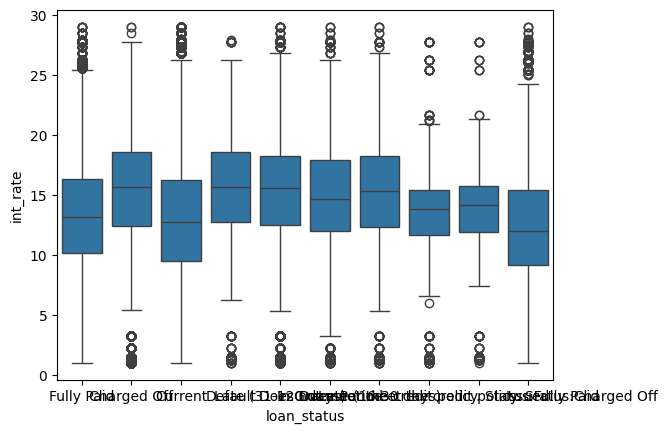

In [138]:

sns.boxplot(x='loan_status', y='int_rate', data=df_2)

In [139]:
df_2.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,,
car,0.049792,0.556377,0.001155,0.001502,0.005892,0.361483,0.004621,0.009358,0.001733,0.008087
credit_card,0.037891,0.726782,0.001136,0.000337,0.001315,0.204977,0.005521,0.010056,0.001875,0.010110
debt_consolidation,0.052584,0.679777,0.001498,0.000558,0.001529,0.230265,0.007632,0.009116,0.002854,0.014186
educational,0.133172,0.002421,NaN,0.077482,0.157385,0.629540,NaN,NaN,NaN,NaN
home_improvement,0.043651,0.674712,0.000928,0.001402,0.002785,0.244563,0.007130,0.009421,0.002666,0.012740
house,0.076391,0.501522,0.001937,0.003045,0.008857,0.368115,0.010241,0.009687,0.003875,0.016330
major_purchase,0.050068,0.596977,0.000827,0.001299,0.005904,0.312157,0.007203,0.010569,0.003011,0.011986
medical,0.066180,0.624342,0.001795,0.002393,0.004308,0.266994,0.006582,0.010890,0.002034,0.014481
moving,0.078868,0.576226,0.001887,0.002830,0.005849,0.295660,0.007925,0.009811,0.004340,0.016604


<Axes: xlabel='purpose', ylabel='int_rate'>

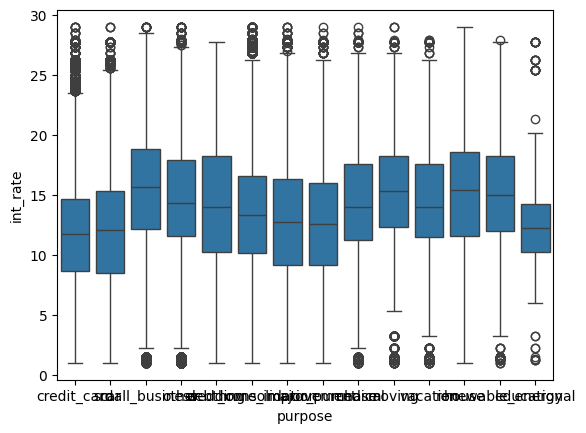

In [140]:

sns.boxplot(x='purpose', y='int_rate', data=df_2)
